# Resources

## Regression Visual Explainers
- https://mlu-explain.github.io/linear-regression/
- https://setosa.io/ev/ordinary-least-squares-regression/
- https://www.statology.org/correlation-vs-regression/
## Linear Regression Explainers
- https://www.youtube.com/watch?v=zPG4NjIkCjc
- https://www.youtube.com/watch?v=CtsRRUddV2s
- https://www.youtube.com/watch?v=m88h75F3Rl8
- https://www.youtube.com/watch?v=qxo8p8PtFeA
- https://www.youtube.com/watch?v=nk2CQITm_eo
## OLS Explainers
- https://www.youtube.com/watch?v=EEwzx9UpgsY
- https://www.youtube.com/watch?v=83yvCZj47c4
- https://www.youtube.com/watch?v=RdvKNJzUWyo
- https://www.youtube.com/watch?v=V7GbQB2rgm0
## GWR Explainers
- https://www.youtube.com/watch?v=YDG3LAijWHQ
- https://www.youtube.com/watch?v=DEDjYUhH3v4
- https://www.youtube.com/watch?v=j5vdBIKfhK8
## MGWR Explainers
- https://www.youtube.com/watch?v=m4drOr1nUNk
- https://www.youtube.com/watch?v=9-vKaUhhltw
- https://www.youtube.com/watch?v=U7Oj4oUzccM
- https://www.youtube.com/watch?v=o8lDAJaFZfU
## GWR and MGWR Docs
- https://medium.com/the-die-is-forecast/geographically-weighted-regression-for-electoral-data-some-extensions-cc0f18d25482
- https://medium.com/the-die-is-forecast/spatial-regression-techniques-for-analyzing-election-data-62a234fc6de1
- https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-statistics/how-geographicallyweightedregression-works.htm
- https://gis.stackexchange.com/questions/387446/interpreting-geographically-weighted-regression-gwr
- https://desktop.arcgis.com/en/arcmap/latest/tools/spatial-statistics-toolbox/interpreting-gwr-results.htm
- https://gwr.maynoothuniversity.ie/
- https://gwr.maynoothuniversity.ie/what-is-gwr/
- https://gisgeography.com/geographically-weighted-regression/
- https://carto.com/blog/how-geographically-weighted-regression-works
- Explore https://github.com/pysal/mgwr (especially the notebooks folder)
- Explore https://pysal.org/

# Prepare Environment

In [1]:
import numpy as np
import pandas as pd
import libpysal as ps

In [2]:
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, shift_colormap, truncate_colormap

In [3]:
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

# Load Ghana Dataset

In [4]:
ghana_raw = pd.read_csv("~/Documents/Research/Infovis/Geospatial/Ghana/ghana.csv")

In [5]:
ghana_raw.head()

,X,Y,fid,Id,gridcode,NETMg1980,NETMg1985,NETMg1990,NETMg1995,NETMg2000,...,TMINMn1990,TMINMn1995,TMINMn2000,TMINMn2005,TMINMn2010,TMINRa1990,TMINRa1995,TMINRa2000,TMINRa2005,TMINRa2010
0,131134.043825,1.220823e+06,1,416420,416420,-9431,-8833,-4747,-4427,4836,...,15.69,17.08,16.80,15.05,14.91,0.039246,0.088725,-0.016029,-0.104207,-0.009395
1,158483.763579,1.220526e+06,2,416421,416421,-2747,-5688,-16171,-15529,-15391,...,15.84,17.26,16.94,14.68,15.11,0.078859,0.089073,-0.018174,-0.133658,0.029378
2,-115782.416534,1.202320e+06,3,417825,417825,-697,-1269,1651,1077,856,...,13.66,15.13,13.68,13.21,13.26,-0.017256,0.107492,-0.095845,-0.033929,0.003449
3,-88337.240478,1.201824e+06,4,417826,417826,0,0,406,347,445,...,14.42,15.91,14.13,13.57,13.87,0.008033,0.103424,-0.111912,-0.039676,0.022348
4,-60902.599088,1.201350e+06,5,417827,417827,428,175,1578,1246,-617,...,14.73,16.49,14.41,13.84,14.66,0.010762,0.119111,-0.125850,-0.039582,0.058952


In [6]:
ghana_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Columns: 149 entries, X to TMINRa2010
dtypes: float64(126), int64(23)
memory usage: 446.0 KB


In [7]:
ghana_net = ghana_raw.filter(like='NET')
ghana_edu = ghana_raw.filter(like='EDU')
ghana_edu.head()

,EDU0Su1995,EDU0Su2000,EDU0Su2005,EDU0Su2010,EDU0Ra2000,EDU0Ra2005,EDU0Ra2010,EDU1Su1995,EDU1Su2000,EDU1Su2005,...,EDU3Ra2000,EDU3Ra2005,EDU3Ra2010,EDUHSu1995,EDUHSu2000,EDUHSu2005,EDUHSu2010,EDUHRa2000,EDUHRa2005,EDUHRa2010
0,11.965681,14.078416,2.000760,1.213848,0.176566,-0.857885,-0.393307,0.520247,1.759802,2.000760,...,0.691314,-0.621026,6.280321,1.579477,1.856459,1.225025,0.796812,0.175,-0.340,-0.350
1,16.127657,24.470316,0.000000,0.000000,0.517289,-1.000000,0.000000,2.080988,0.906308,0.000000,...,0.000000,0.000000,0.000000,1.132960,0.836894,0.000000,1.330205,-0.261,0.000,0.000
2,5.864320,4.720776,1.354090,2.647208,-0.195000,-0.713164,0.954972,1.379840,1.180194,1.083272,...,0.000000,0.000000,0.000000,0.370906,0.457614,0.712347,1.007149,0.234,0.557,0.414
3,3.794560,5.465775,4.346069,0.551742,0.440424,-0.204858,-0.873048,0.344960,0.260275,1.002939,...,0.000000,0.000000,3.125939,0.391512,0.400713,1.358079,0.000000,0.024,2.389,0.000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.712523,0.000,0.000,0.000


In [8]:
ghana_subset = pd.merge(ghana_edu, ghana_net, left_index=True, right_index=True)
ghana_subset.head()

,EDU0Su1995,EDU0Su2000,EDU0Su2005,EDU0Su2010,EDU0Ra2000,EDU0Ra2005,EDU0Ra2010,EDU1Su1995,EDU1Su2000,EDU1Su2005,...,NETMg1990,NETMg1995,NETMg2000,NETMg2005,NETMg2010,NETRa1990,NETRa1995,NETRa2000,NETRa2005,NETRa2010
0,11.965681,14.078416,2.000760,1.213848,0.176566,-0.857885,-0.393307,0.520247,1.759802,2.000760,...,-4747,-4427,4836,3647,2507,-0.462583,-0.067411,-2.092388,-0.245864,-0.312586
1,16.127657,24.470316,0.000000,0.000000,0.517289,-1.000000,0.000000,2.080988,0.906308,0.000000,...,-16171,-15529,-15391,-15784,-16281,1.843003,-0.039701,-0.008887,0.025534,0.031488
2,5.864320,4.720776,1.354090,2.647208,-0.195000,-0.713164,0.954972,1.379840,1.180194,1.083272,...,1651,1077,856,141,-575,-2.301024,-0.347668,-0.205200,-0.835280,-5.078014
3,3.794560,5.465775,4.346069,0.551742,0.440424,-0.204858,-0.873048,0.344960,0.260275,1.002939,...,406,347,445,375,307,0.000000,-0.145320,0.282421,-0.157303,-0.181333
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1578,1246,-617,-755,-899,8.017143,-0.210393,-1.495185,0.223663,0.190728


<AxesSubplot:>

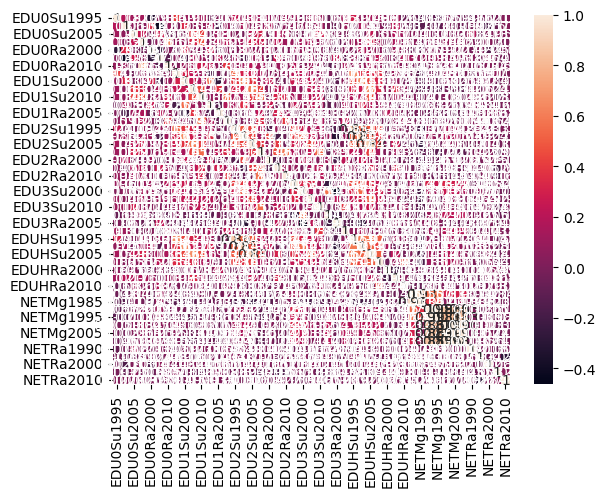

In [9]:
import seaborn as sns
sns.heatmap(ghana_subset.corr(), annot=True)

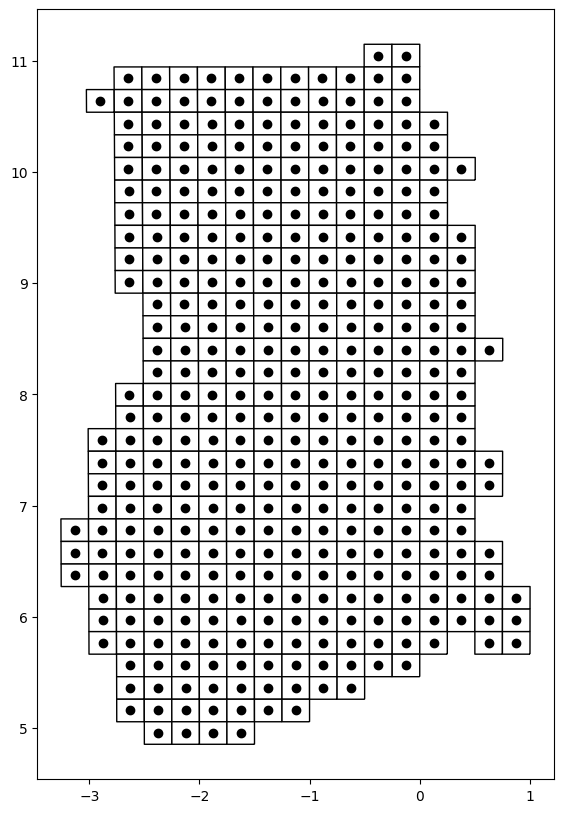

In [10]:
# load Ghana MGWR dataset
ghana = gp.read_file('ghana_mgwr/ghana_mgwr.shp')
fix, ax = plt.subplots(figsize = (10, 10))
ghana.plot(ax=ax, **{'edgecolor': 'black', 'facecolor': 'white'})
ghana.centroid.plot(ax = ax, c = 'black')
plt.savefig('ghana_mgwr_shp')
plt.show()

In [11]:
ghana.head()

,fid,Id,gridcode,NETMg1980,NETMg1985,NETMg1990,NETMg1995,NETMg2000,NETMg2005,NETMg2010,...,TMINMn2005,TMINMn2010,TMINRa1990,TMINRa1995,TMINRa2000,TMINRa2005,TMINRa2010,x,y,geometry
0,1.0,416420.0,416420.0,-9431,-8833,-4747,-4427,4836,3647,2507,...,15.05,14.91,0.039246,0.088725,-0.016029,-0.104207,-0.009395,-0.375,11.024998,"POLYGON ((-0.25229 10.94389, -0.50457 10.94389..."
1,2.0,416421.0,416421.0,-2747,-5688,-16171,-15529,-15391,-15784,-16281,...,14.68,15.11,0.078859,0.089073,-0.018174,-0.133658,0.029378,-0.125,11.024998,"POLYGON ((0 10.94389, -0.25229 10.94389, -0.25..."
2,3.0,417825.0,417825.0,-697,-1269,1651,1077,856,141,-575,...,13.21,13.26,-0.017256,0.107492,-0.095845,-0.033929,0.003449,-2.625,10.824997,"POLYGON ((-2.5218 10.7403, -2.77398 10.7403, -..."
3,4.0,417826.0,417826.0,0,0,406,347,445,375,307,...,13.57,13.87,0.008033,0.103424,-0.111912,-0.039676,0.022348,-2.375,10.824997,"POLYGON ((-2.26962 10.7403, -2.5218 10.7403, -..."
4,5.0,417827.0,417827.0,428,175,1578,1246,-617,-755,-899,...,13.84,14.66,0.010762,0.119111,-0.125850,-0.039582,0.058952,-2.125,10.824997,"POLYGON ((-2.01744 10.7403, -2.26962 10.7403, ..."


# Ghana GWR

In [12]:
# Prepare ghana inputs
gha_y = ghana['NETRa2010'].values.reshape((-1, 1)) # does reshape need to be tacked on?
gha_X = ghana[['WATRa2010', 'ELECRa2010', 'MALIRa2010', 'MALPRa2010', 'BIRRa2010', 'EDU0Ra2010', 'EDU1Ra2010', 'EDU2Ra2010', 'EDU3Ra2010', 'EDUHRa2010', 'CONFRa2010', 'MLDSRa2010', 'MLWSRa2010', 'PRECRa2010', 'TMAXRa2010', 'TMINRa2010']].values
u = ghana['x']
v = ghana['y']
gha_coords = list(zip(u, v))

In [13]:
gha_X = (gha_X - gha_X.mean(axis=0)) / gha_X.std(axis=0)

gha_y = gha_y.reshape((-1,1))

gha_y = (gha_y - gha_y.mean(axis=0)) / gha_y.std(axis=0)

In [14]:
# calibrate a GWR model using selected bandwidth

gwr_selector = Sel_BW(gha_coords, gha_y, gha_X)
gwr_bw = gwr_selector.search(bw_min=2)
print(gwr_bw)
gwr_results = GWR(gha_coords, gha_y, gha_X, gwr_bw).fit()

/home/gbby/.local/lib/python3.10/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.09702e-18): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/gbby/.local/lib/python3.10/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.17383e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/gbby/.local/lib/python3.10/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.75109e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/gbby/.local/lib/python3.10/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.22143e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/gbby/.local/lib/python3.10/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.29604e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/gbby/.local/lib/python3.10/site-packages/spglm/iw

349.0


In [15]:
#Calibrate MGWR model

mgwr_selector = Sel_BW(gha_coords, gha_y, gha_X, multi=True)
mgwr_bw = mgwr_selector.search(multi_bw_min=[2])
print(mgwr_bw)
mgwr_results = MGWR(gha_coords, gha_y, gha_X, mgwr_selector).fit()

/home/gbby/.local/lib/python3.10/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.22665e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/gbby/.local/lib/python3.10/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.10312e-18): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/gbby/.local/lib/python3.10/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.09869e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/gbby/.local/lib/python3.10/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.17134e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/gbby/.local/lib/python3.10/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.64048e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/gbby/.local/lib/python3.10/site-packages/spglm/iw

Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

[382. 380. 382. 382. 382. 382. 156.  32. 382. 382. 382. 382.  18.   7.
 382. 382. 382.]


Inference:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
mgwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 383
Number of covariates:                                                    17

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            372.745
Log-likelihood:                                                    -538.256
AIC:                                                               1110.512
AICc:                                                              1114.391
BIC:                                                              -1804.236
R2:                                                                   0.027
Adj. R2:                                                             -0.016

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [17]:
#Prepare GWR results for mapping

#Add GWR parameters to GeoDataframe
ghana['gwr_intercept'] = gwr_results.params[:,0]
ghana['gwr_WATRa2010'] = gwr_results.params[:,1]
ghana['gwr_BIRRa2010'] = gwr_results.params[:,2]
ghana['gwr_EDU1Ra2010'] = gwr_results.params[:,3]

#Obtain t-vals filtered based on multiple testing correction
gwr_filtered_t = gwr_results.filter_tvals()

In [18]:
#Prepare MGWR results for mapping

#Add MGWR parameters to GeoDataframe
ghana['mgwr_intercept'] = mgwr_results.params[:,0]
ghana['mgwr_WATRa2010'] = mgwr_results.params[:,1]
ghana['mgwr_BIRRa2010'] = mgwr_results.params[:,2]
ghana['mgwr_EDU1Ra2010'] = mgwr_results.params[:,3]

#Obtain t-vals filtered based on multiple testing correction
mgwr_filtered_t = mgwr_results.filter_tvals()

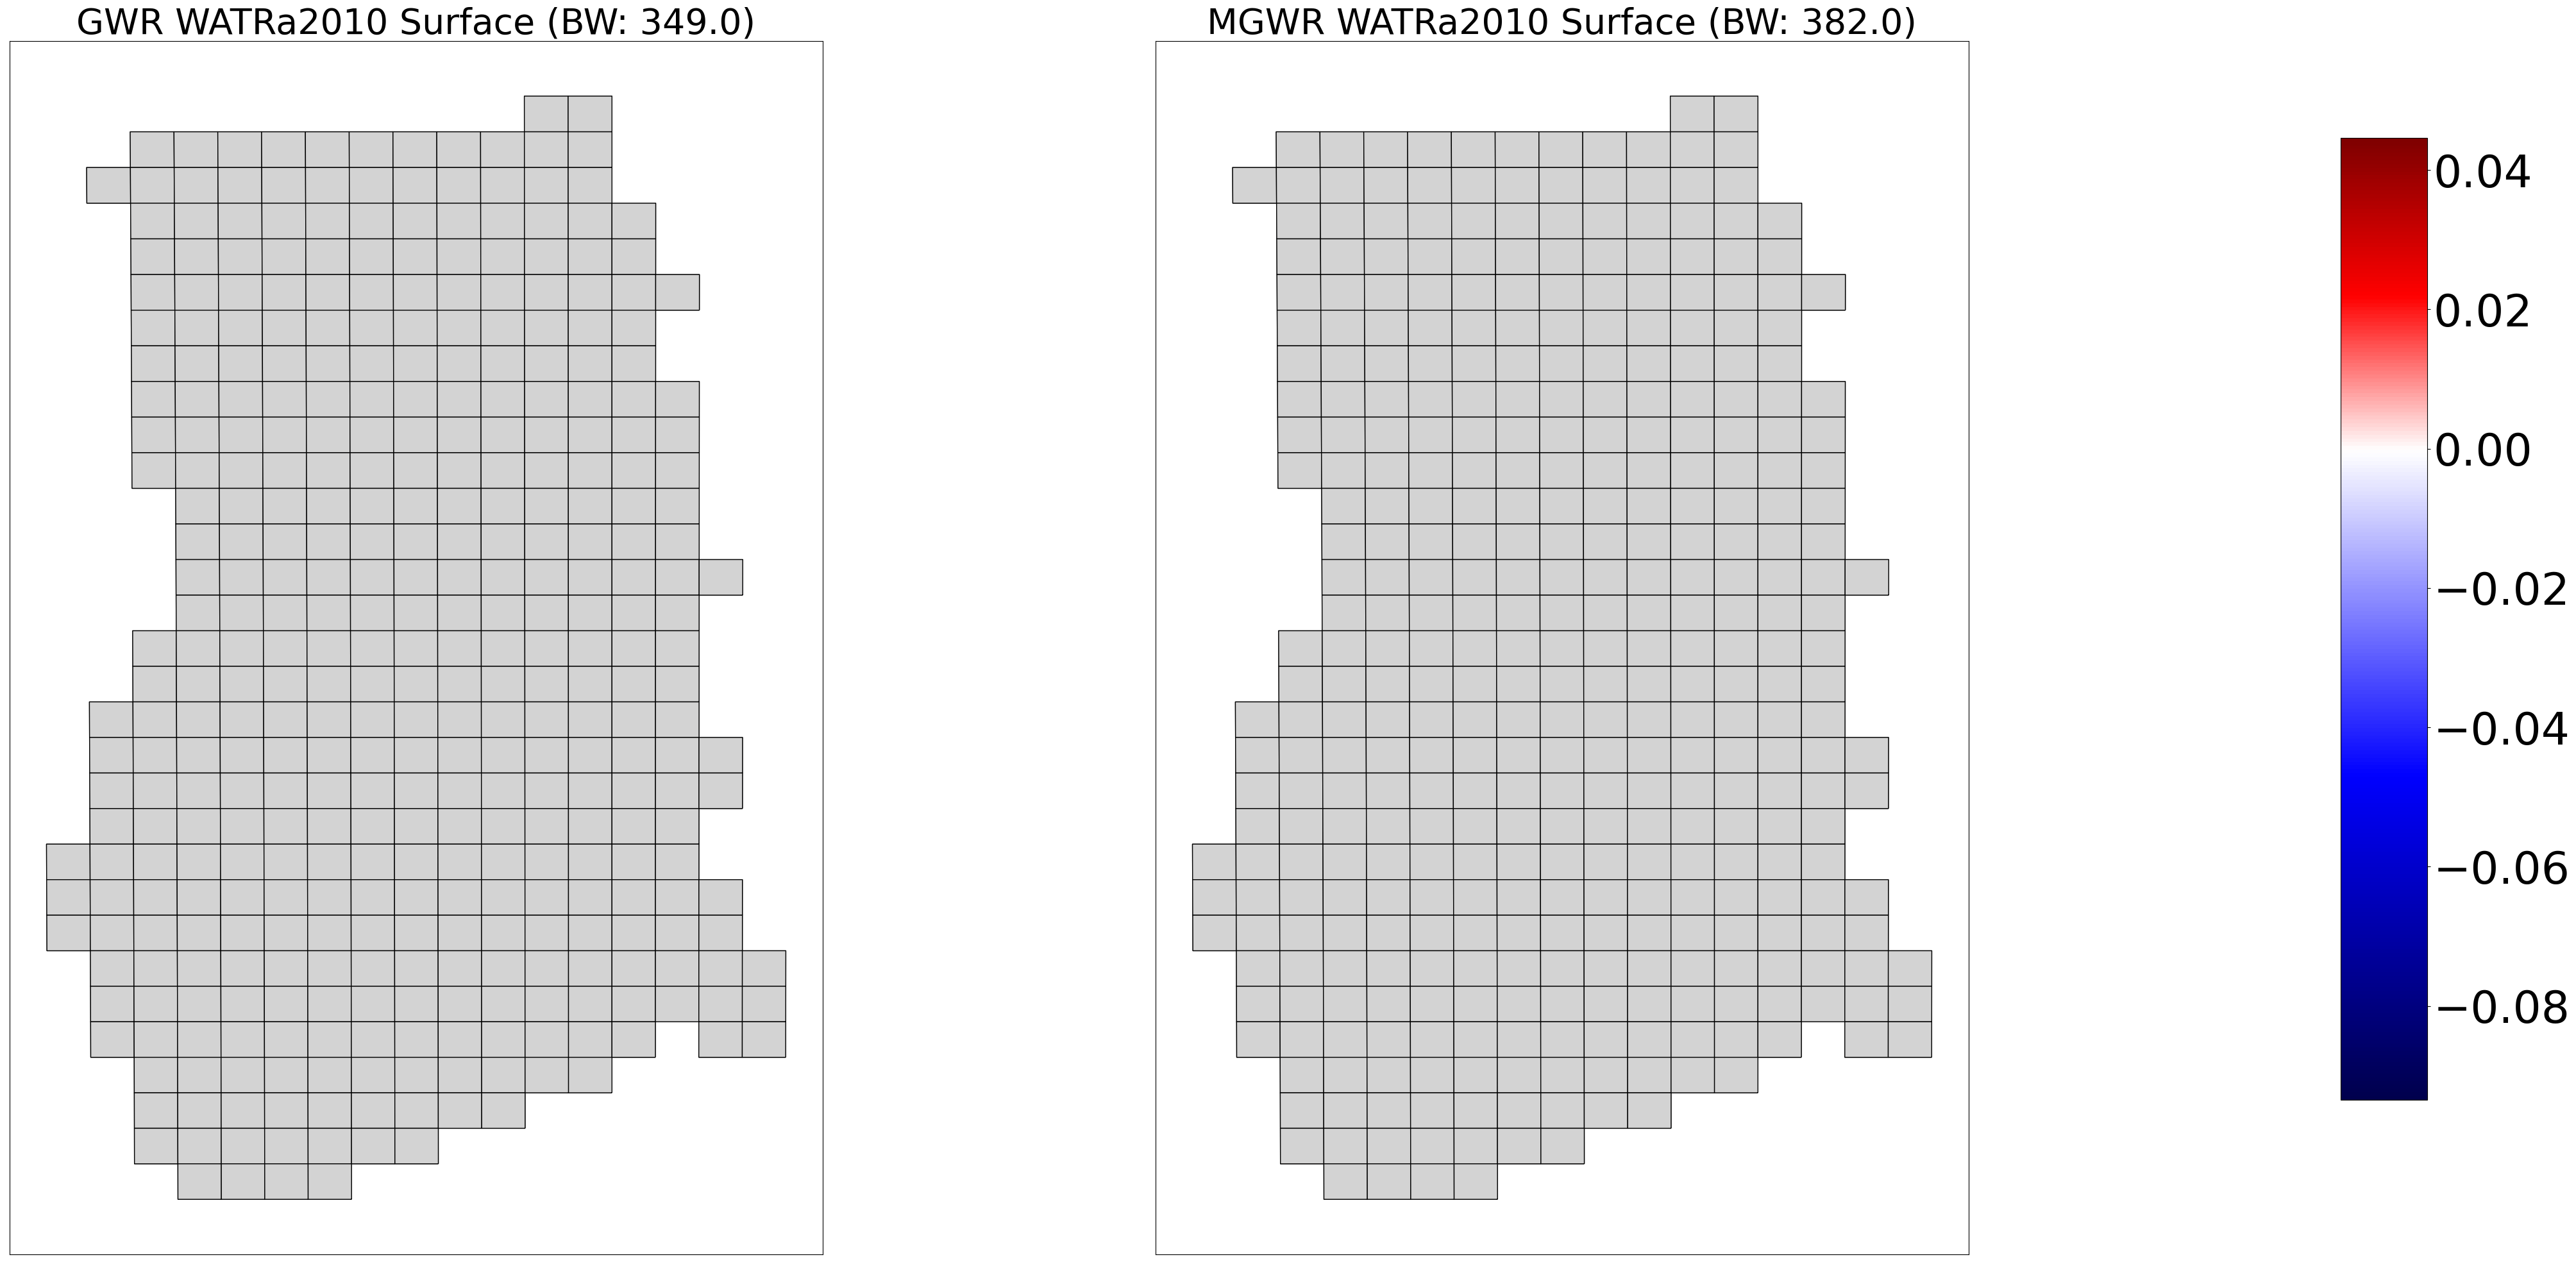

In [19]:
# this requires matplotlib 3.5.1 or older to truncate and shift the colormap

#Comparison maps of GWR vs. MGWR parameter surfaces where the grey units pertain to statistically insignificant parameters

#Prep plot and add axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(45,20))
ax0 = axes[0]
ax0.set_title('GWR WATRa2010 Surface (BW: ' + str(gwr_bw) +')', fontsize=40)
ax1 = axes[1]
ax1.set_title('MGWR WATRa2010 Surface (BW: ' + str(mgwr_bw[0]) +')', fontsize=40)

#Set color map
cmap = plt.cm.seismic

#Find min and max values of the two combined datasets
gwr_min = ghana['gwr_WATRa2010'].min()
gwr_max = ghana['gwr_WATRa2010'].max()
mgwr_min = ghana['mgwr_WATRa2010'].min()
mgwr_max = ghana['mgwr_WATRa2010'].max()
vmin = np.min([gwr_min, mgwr_min])
vmax = np.max([gwr_max, mgwr_max])

#If all values are negative use the negative half of the colormap
if (vmin < 0) & (vmax < 0):
    cmap = truncate_colormap(cmap, 0.0, 0.5)
#If all values are positive use the positive half of the colormap
elif (vmin > 0) & (vmax > 0):
    cmap = truncate_colormap(cmap, 0.5, 1.0)
#Otherwise, there are positive and negative values so the colormap so zero is the midpoint
else:
    cmap = shift_colormap(cmap, start=0.0, midpoint=1 - vmax/(vmax + abs(vmin)), stop=1.)

#Create scalar mappable for colorbar and stretch colormap across range of data values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

#Plot GWR parameters
ghana.plot('gwr_WATRa2010', cmap=sm.cmap, ax=ax0, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
#If there are insignificnt parameters plot gray polygons over them
if (gwr_filtered_t[:,0] == 0).any():
    ghana[gwr_filtered_t[:,0] == 0].plot(color='lightgrey', ax=ax0, **{'edgecolor':'black'})

#Plot MGWR parameters
ghana.plot('mgwr_WATRa2010', cmap=sm.cmap, ax=ax1, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
#If there are insignificnt parameters plot gray polygons over them
if (mgwr_filtered_t[:,0] == 0).any():
    ghana[mgwr_filtered_t[:,0] == 0].plot(color='lightgrey', ax=ax1, **{'edgecolor':'black'})
 
#Set figure options and plot 
fig.tight_layout()    
fig.subplots_adjust(right=0.9)
cax = fig.add_axes([0.92, 0.14, 0.03, 0.75])
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=50) 
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
plt.show()